In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Crop_recommendation.csv')

In [3]:
df.sample(7)

,N,P,K,temperature,humidity,ph,rainfall,label
1633,15,14,8,10.010813,90.223992,6.220943,119.394106,orange
1635,0,12,7,20.184323,90.654585,6.969250,116.813097,orange
1050,107,72,45,28.149389,81.544489,5.790768,91.405084,banana
215,28,72,84,18.729631,19.181973,6.481783,71.580102,chickpea
551,22,42,22,25.542491,56.966408,7.887659,48.467970,mothbeans
1335,108,22,46,26.176687,86.729520,6.121169,53.334850,watermelon
100,71,54,16,22.613600,63.690706,5.749914,87.759539,maize


In [4]:
df['label'].value_counts().count()

np.int64(22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


<Axes: ylabel='ph'>

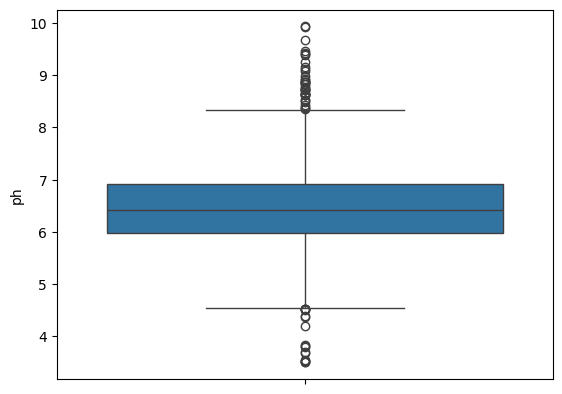

In [6]:
sns.boxplot(df['ph'])

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='label'), df['label'], test_size=0.2)

In [10]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
1834,23,6,33,29.180326,92.730412,6.025790,204.960368
45,91,35,38,24.897282,80.525861,6.134287,183.679321
797,42,79,23,27.716783,63.291034,6.781842,68.565080
1265,39,132,196,35.830891,83.325601,5.778594,73.679849
1632,8,16,6,12.228162,90.264574,7.106650,108.416171
...,...,...,...,...,...,...,...
1246,4,134,200,28.578288,80.956290,5.840256,73.342321
123,83,45,21,18.833445,58.750820,5.716223,79.753290
318,10,55,23,21.188532,19.634386,5.728233,137.194863
554,32,41,16,28.636189,61.394513,7.702287,68.548779


In [11]:
le = LabelEncoder()
y_train1 = le.fit_transform(y_train)
y_test1 = le.fit_transform(y_test)

In [12]:
from sklearn.metrics import accuracy_score, r2_score

In [13]:
classes = np.unique(y_test1)
classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [14]:
sgd = SGDClassifier()

In [15]:
sgd.fit(x_train, y_train1)

SGDClassifier()

In [16]:
pred1 = sgd.predict(x_test)

In [17]:
accuracy_score(y_test1, pred1)

0.5954545454545455

In [18]:
sgd.partial_fit(x_test, y_test1, classes=classes)

SGDClassifier()

In [19]:
pred2 = sgd.predict(x_test)

In [20]:
accuracy_score(y_test1, pred2)

0.8340909090909091